In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [ ]:
%matplotlib notebook
import time

plt.ion()
 
# here we are creating sub plots
figure, ax = plt.subplots(figsize=(10,5))
 
# setting title
plt.title("OpenFOAM sim", fontsize=20)
 
# setting x-axis label and y-axis label
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
targline = ax.axhline(y=0, c='r')

# Loop
i = 0
while i < 800: 
    coeffs = np.loadtxt("../runs/GRTsteady4Struct5/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")

    #line1.set_xdata(np.arange(len(coeffs[10:,3])))
    ax.plot(coeffs[10:,3], c="b")
    targline.set_ydata(y=coeff[3])
    # drawing updated values
    figure.canvas.draw()
    # This will run the GUI event
    # loop until all UI events
    # currently waiting have been processed
    figure.canvas.flush_events()
    i = len(coeffs[:,3])
    #time.sleep(10)
coeff = np.mean(coeffs[-100:], axis=0)
print(coeff[3]) 

<IPython.core.display.Javascript object>


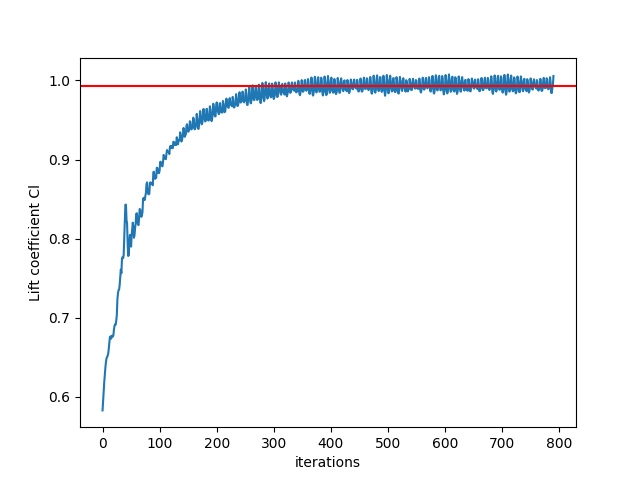

-0.04400825153333339 0.9933827536666663


In [15]:
coeffs = np.loadtxt("../runs/GRTsteady4Struct5/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-300:], axis=0)

plt.plot(coeffs[10:,3])
plt.axhline(y=coeff[3], c='r')
plt.xlabel("iterations")
plt.ylabel("Lift coefficient Cl")

print(coeff[2], coeff[3])


In [3]:
def getMeshSize(sweepdir):
    cwd = os.getcwd()
    files = np.array(os.listdir(sweepdir))
    sizes = np.zeros(len(files))
    for i, file in enumerate(files): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            sizes[i] = float(lines[30][10:])
            file.close()
        os.chdir(cwd)
    return files, sizes

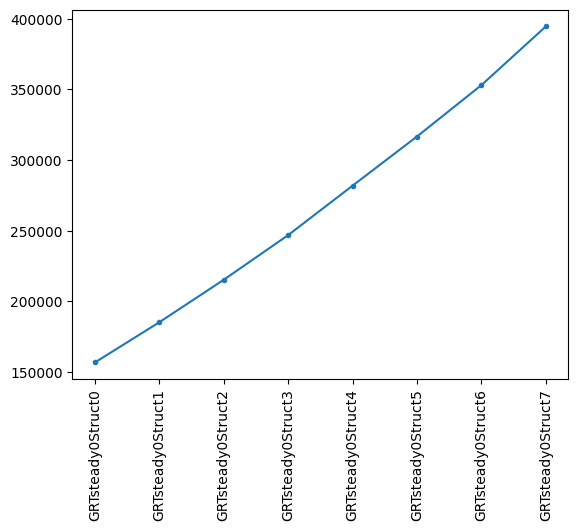

[156815. 185284. 215321. 246926. 281904. 316701. 353066. 394565.]


In [4]:
files, sizes = getMeshSize("../meshsweep")
plt.plot(sizes[sizes.argsort()], marker=".")
plt.xticks(range(0,len(files)), files[sizes.argsort()], rotation=90)
plt.show()
print(sizes[sizes.argsort()])

In [5]:
def plot_coeffs(sweepdir):
    
    cwd = os.getcwd()
    files = os.listdir(sweepdir)
    coefficients = np.zeros((len(files),3))
    sizes = np.zeros(len(files))
    for i,file in enumerate(sorted(files)): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            coefficients[i,0] = float(lines[30][10:])
            sizes[i] = float(lines[30][10:])
            file.close()
        coefs = np.loadtxt("postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9 , delimiter="\t")
        coefficients[i,1:] = np.mean(coefs[-175:,2:4], axis=0)
        os.chdir(cwd)
    return sorted(files),sizes, coefficients

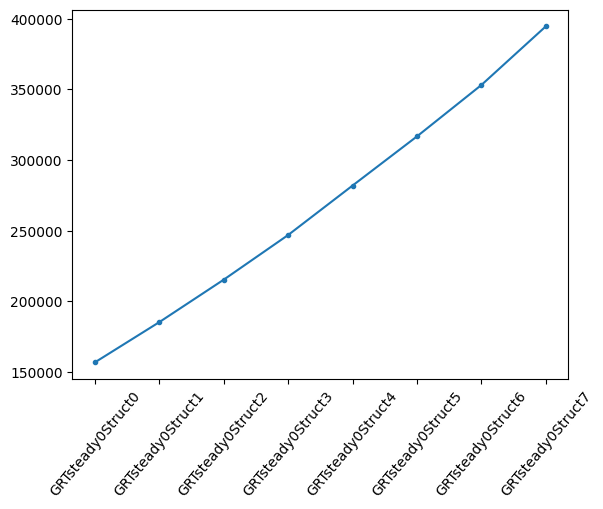

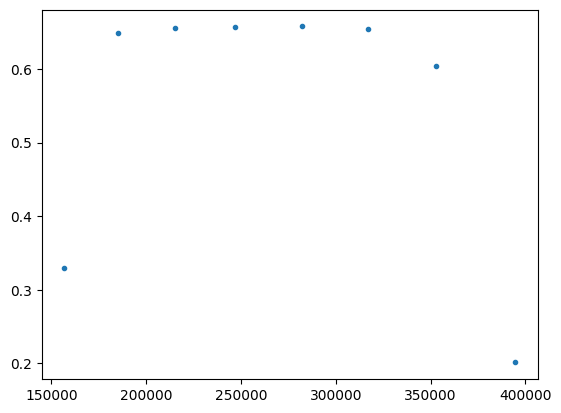

In [6]:
files, sizes, coeffs = plot_coeffs("../meshsweep")
plt.plot(sizes, marker=".")
plt.xticks(range(0,len(files)), files, rotation=50)
plt.show()
coeffs = coeffs[coeffs[:,0].argsort()]
plt.scatter(coeffs[:,0], coeffs[:,2],marker=".")
plt.show()

In [ ]:
coeffs = np.loadtxt("../meshsweep/GRTsteady4Mesh12/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-50:], axis=0)
print(coeff[3], coeff[2])
plt.figure(figsize=(6,4), dpi=110)
plt.plot(coeffs[10:,3])
plt.show()
plt.plot(coeffs[10:,2])

